# people：文章的影響指數
* 如果文章的關鍵字重覆很多，表示相似度高，可認定文章的相似性很高，有可能相互影響。稱為漣漪效應。
* 計算文章與後續文章的相似度，加總之後，即得該篇文章的漣漪效應強弱。
* 尋找最重要的文章。

In [1]:
# year=[1946,1947,1948,1949,
#       1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,
#       1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,
#       1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,
#       1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,
#       1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,
#       2000,2001,2002,2003]
year=[1966,1967,1968,1969,
      1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,
      1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,
      1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,
      2000,2001,2002,2003]
path="D:/my python/people/" 
topic=["文革","文化大革命"]
title="文化大革命"

## 主題，選取範圍

In [10]:
# 以文章為單位，讀取 TFIDF 轉為 set
import re
import pandas as pd
filename=[]
years=[]
tfidf=[]
for n in range(len(year)):
    fname=str(year[n])+"_jieba.xlsx"
    df=pd.read_excel(path+"people_jieba/"+fname, 0)  
    ####################################
    # 只保留有提及 topic 的文章，不然太多了。
    ####################################
    sel=[]
    for m in range(len(df)):
        for t in topic:
            if type(df.doc_content[m])==str:
                if df.doc_content[m].find(t)!=-1:
                    sel.append(m)
                    break
    df1=df.iloc[sel]
    
    # 刪除 nan 的row 
    df1= df1.dropna(subset=["tfidf"])
    tf=list(df1.tfidf)  
    file=list(df1.filename)
    tfidf+=tf
    years+=[year[n]]*len(df1)
    filename+=file    
    print (year[n],len(df),"->",len(df1),"done")    
print (len(tfidf),len(years), len(filename))

1966 12206 -> 1775 done
1967 9132 -> 4027 done
1968 8878 -> 3603 done
1969 9802 -> 3036 done
1970 11171 -> 1927 done
1971 11174 -> 1386 done
1972 14009 -> 1134 done
1973 14483 -> 1439 done
1974 12576 -> 2100 done
1975 12867 -> 1614 done
1976 12042 -> 3057 done
1977 12277 -> 937 done
1978 13281 -> 691 done
1979 17501 -> 668 done
1980 26899 -> 666 done
1981 28946 -> 478 done
1982 29172 -> 372 done
1983 32099 -> 388 done
1984 32678 -> 690 done
1985 35224 -> 549 done
1986 34557 -> 478 done
1987 33624 -> 378 done
1988 34639 -> 363 done
1989 31243 -> 488 done
1990 31831 -> 294 done
1991 13520 -> 90 done
1992 7523 -> 48 done
1993 33052 -> 233 done
1994 33493 -> 246 done
1995 37308 -> 270 done
1996 35976 -> 195 done
1997 33837 -> 325 done
1998 34802 -> 360 done
1999 35112 -> 244 done
2000 36828 -> 206 done
2001 37565 -> 169 done
2002 36706 -> 147 done
2003 45428 -> 177 done
35248 35248 35248


In [11]:
data=list(zip(years, filename, tfidf))
df=pd.DataFrame(data,columns=["year", "filename", "tfidf"])
import random
n =random.randint(0,len(df))
df.iloc[n]

year                                                     1984
filename                               人民日報_19840914_4_668830
tfidf       毕寿平,横加,知识分子,副厂长,坝子,个体户,酒厂,严肃处理,矿务局,红薯,武汉市,自来水,...
Name: 29721, dtype: object

# 以關鍵字的交集代表相似性

## 計算文章影響指數

In [12]:
# 計算各篇文章的總分
# 這個非常花時間。######################千萬不要嘗試，整整跑了三天
import numpy as np
score=[]
m=-1
for n in range(len(tfidf)):
    ss=[]  
    m=n+1
    for m in range(len(tfidf)):
        if m<len(tfidf)-1:
            s=set(tfidf[n].split(",")).intersection(set(tfidf[m].split(",")))
            ss.append(len(s))      
    score.append(sum(ss))
    if n%100==0:
        print (n,"/",len(tfidf),"done")
print (len(score))

0 / 35248 done
100 / 35248 done
200 / 35248 done
300 / 35248 done
400 / 35248 done
500 / 35248 done
600 / 35248 done
700 / 35248 done
800 / 35248 done
900 / 35248 done
1000 / 35248 done
1100 / 35248 done
1200 / 35248 done
1300 / 35248 done
1400 / 35248 done
1500 / 35248 done
1600 / 35248 done
1700 / 35248 done
1800 / 35248 done
1900 / 35248 done
2000 / 35248 done
2100 / 35248 done
2200 / 35248 done
2300 / 35248 done
2400 / 35248 done
2500 / 35248 done
2600 / 35248 done
2700 / 35248 done
2800 / 35248 done
2900 / 35248 done
3000 / 35248 done
3100 / 35248 done
3200 / 35248 done
3300 / 35248 done
3400 / 35248 done
3500 / 35248 done
3600 / 35248 done
3700 / 35248 done
3800 / 35248 done
3900 / 35248 done
4000 / 35248 done
4100 / 35248 done
4200 / 35248 done
4300 / 35248 done
4400 / 35248 done
4500 / 35248 done
4600 / 35248 done
4700 / 35248 done
4800 / 35248 done
4900 / 35248 done
5000 / 35248 done
5100 / 35248 done
5200 / 35248 done
5300 / 35248 done
5400 / 35248 done
5500 / 35248 done
5600

In [13]:
## 存檔
# save excel
pth="D:/my python/people/working/"     #先建一個 working 目錄
fname=pth+"simi"+title+".xlsx"
writer = pd.ExcelWriter(fname)
df.to_excel(writer,'Sheet1',encoding='utf-8')
writer.save()

In [14]:
###################################################
import pandas as pd
pth="D:/my python/people/working/"    
fname=pth+"simi"+title+".xlsx"
df=pd.read_excel(fname, 0)
df

,Unnamed: 0,year,filename,tfidf
0,0,1966,人民日報_19660128_6_351960,"群众,出版物,美术,工农兵,毛主席,画片,上海人民美术出版社,印制,著作,广大群众,一分钱,..."
1,1,1966,人民日報_19660419_6_355238,"文艺,三十,电影,路线,年代,资产阶级,工农兵,工农,电影史,左翼,文艺思想,编著者,毛泽东..."
2,2,1966,人民日報_19660419_1_355207,"文艺,资产阶级,革命,无产阶级,毛主席,工农兵,文化战线,思想,斗争,阶级斗争,毛泽东思想,..."
3,3,1966,人民日報_19660424_6_355399,"兵临城下,影片,敌人,敌军,资产阶级,崇武,毛主席,国民党,郑汉臣,反动,作者,瓦解,阶级,..."
4,4,1966,人民日報_19660425_6_355436,"故事,革命,工农兵,群众,斗争,样板,文艺,阵地,兴无灭资,故事员,大讲,封建主义,毛泽东思..."
...,...,...,...,...
35243,35243,2003,人民日报_20031226_4_1288139,"毛泽东,1949,传记,1976,错误,历史,读者,这部,材料,书中,出版,新中国,主编,教..."
35244,35244,2003,人民日报_20031227_1_1288807,"发展,建设,同志,中国特色社会主义,中国,毛泽东,毛泽东思想,道路,事业,群众,小康社会,马..."
35245,35245,2003,人民日报_20031227_7_1289451,"程小青,探案,霍桑,附中,苏州,正养,孤岛,老师,范烟桥,侦探小说,东吴,作家,日寇,上海,..."
35246,35246,2003,人民日报_20031229_5_1291890,"杨卫,学生,插队,10,参评,当选,院士,招生,受苦,研究生,知识青年,学校,西北工业大学,..."


In [15]:
# 依分數高低排序
df["score"]=score

df2=df.sort_values(by='score', ascending=False)
df2.head(20)

,Unnamed: 0,year,filename,tfidf,score
15063,15063,1971,人民日報_19710701_1_409063,"毛主席,革命,无产阶级,路线,我们,社会主义,刘少奇,资产阶级,机会主义,马克思列宁主义,王...",476769
5802,5802,1968,人民日報_19680101_2_372961,"无产阶级,革命,毛主席,文化大革命,毛泽东思想,群众,最新,胜利,一小撮,夺取,一九六八年,...",475253
25714,25714,1977,人民日報_19770823_1_491934,"毛主席,四人帮,无产阶级,社会主义,革命,我们,走资派,专政,他们,资产阶级,斗争,党内,反...",469304
10584,10584,1969,人民日報_19690428_1_385691,"无产阶级,毛主席,革命,专政,刘少奇,修正主义,资产阶级,斗争,群众,苏修,帝国主义,文化大...",465011
4842,4842,1967,人民日報_19671001_3_370652,"无产阶级,革命,毛主席,文化大革命,毛泽东思想,专政,资产阶级,阶级斗争,资本主义,胜利,马...",463750
25468,25468,1977,人民日報_19770508_1_488104,"大庆,四人帮,社会主义,学大庆,企业,毛主席,革命,工业,无产阶级,我们,他们,我国,普及,...",460376
25755,25755,1977,人民日報_19770908_1_492444,"毛主席,我们,指示,同志,中央办公厅,五七,群众,无产阶级,四人帮,革命,伟大领袖,学校,你...",457632
19561,19561,1974,人民日報_19740710_3_451433,"批林批孔,革命,团结,无产阶级,孔孟之道,马克思主义,批判,路线,毛主席,我们,工人阶级,群...",453549
21858,21858,1975,人民日報_19751205_3_470312,"无产阶级,教育,资产阶级,学校,革命,专政,毛主席,知识分子,教育战线,改造,路线,马克思主...",448913
25081,25081,1976,人民日報_19761228_1_483822,"四人帮,毛主席,我们,无产阶级,革命,社会主义,他们,伟大,马克思主义,群众,专政,路线,理...",448740


## 與某篇文章其最相關的十篇文章

In [16]:
################################
target=4842
################################
ss=[]
filename=[]
year=[]
for m in range(target,len(df.tfidf)):
    if m<=len(df.tfidf)-1:
        s=set(df.tfidf[target].split(",")).intersection(set(df.tfidf[m].split(",")))
        ss.append(len(s))      
        filename.append(df.filename[m])
        year.append(df.year[m])
data=list(zip(filename,year, ss))
dfs=pd.DataFrame(data,columns=["filename","year","ss"])
dfs

,filename,year,ss
0,人民日報_19671001_3_370652,1967,100
1,人民日報_19671001_4_370653,1967,10
2,人民日報_19671001_5_370654,1967,22
3,人民日報_19671001_6_370656,1967,35
4,人民日報_19671001_6_370657,1967,28
...,...,...,...
30401,人民日报_20031226_4_1288139,2003,10
30402,人民日报_20031227_1_1288807,2003,19
30403,人民日报_20031227_7_1289451,2003,2
30404,人民日报_20031229_5_1291890,2003,0


In [17]:
# 排序
dfs2=dfs.sort_values(by='ss', ascending=False)
dfs2.head(20)

,filename,year,ss
0,人民日報_19671001_3_370652,1967,100
5742,人民日報_19690428_1_385691,1969,51
151,人民日報_19671012_4_370921,1967,49
960,人民日報_19680101_2_372961,1968,48
2217,人民日報_19680517_1_376349,1968,47
1313,人民日報_19680208_4_373846,1968,46
128,人民日報_19671010_2_370870,1967,46
397,人民日報_19671106_1_371552,1967,45
74,人民日報_19671006_3_370772,1967,44
82,人民日報_19671007_3_370790,1967,44


## 讀取前十篇文章

In [18]:
for n in range(10):
    year=dfs2.year[n]
    fname=str(year)+"_jieba.xlsx"
    temp=pd.read_excel(path+"jieba/"+fname, 0)  
    content=temp[temp.filename==dfs2.filename[n]].doc_content
    print(n,dfs2.filename[n],"-----------------",dfs2.ss[n])
    print(list(content))

0 人民日報_19671001_3_370652 ----------------- 100
['——庆祝中华人民共和国成立十八周年?《人民日报》、《红旗》杂志、《解放军报》编辑部在毛泽东思想的光辉大道上，乘着无产阶级文化大革命的浩荡东风，我们胜利地迎接了中华人民共和国成立十八周年。在这盛大节日的前夕，我们伟大的领袖毛主席视察了华北、中南和华东地区的喜讯，传遍全国，给几亿革命群众以极大的新鼓舞。我们热烈欢迎来自世界各国的同志们和朋友们，他们将同我们一起，在文化大革命的高潮中欢度我们的国庆节。中华人民共和国的十八年，是无产阶级和资产阶级两大对抗阶级生死斗争的十八年，是社会主义道路战胜资本主义道路的十八年，是无产阶级专政日益加强和巩固的十八年。遵照着毛主席指出的方向，十八年来，经过广大劳动人民的共同努力，共同奋斗，我们在社会主义的道路上取得了极其辉煌的成就。社会主义制度促进了我国生产力的突飞猛进的发展。在毛主席亲自制定的社会主义建设总路线的指引下，出现了工农业生产和各项建设事业的全面大跃进。我们的祖国由一个贫困落后、灾难深重的国家，一跃而为繁荣昌盛、蒸蒸日上的社会主义强国。解放以来，我们打退了资产阶级一次又一次的猖狂进攻，取得了一个又一个的伟大胜利。我们取得了“三反”“五反”运动和反右派斗争的胜利，取得了反对党内右倾机会主义分子的胜利，取得了城乡社会主义教育运动的胜利。在思想文化战线上，我们对资产阶级展开了多次的批判。十八年来，我国人民对帝国主义、现代修正主义和各国反动派进行了英勇的斗争。在抗美援朝战争中，我们和朝鲜人民一道，使美帝国主义遭受到惨重的失败。我们在支援越南人民以及其他各国人民的革命斗争中，作出了自己的国际主义贡献。我们同世界各国马克思列宁主义者一道，对以苏修叛徒集团为中心的现代修正主义，进行了彻底的揭露，坚决的斗争，推动了国际共产主义运动在新阶段上的胜利发展。十八年来的历史充分地证明：只有毛泽东思想才能救中国。在毛泽东思想的伟大革命红旗下，坚持走社会主义道路，坚持无产阶级革命和无产阶级专政，这就是我们走过的战斗历程。这就是我们的方向。在建国以来的光辉历史中，值得我们大书特书的，就是我们正在进行的这场由毛主席亲自发动亲自领导的、史无前例的无产阶级文化大革命。我国广大的工农兵、革命干部、革命知识分子，高举毛泽东思想伟大红旗，登上了无产阶级文化大革命的政治舞台，

## 相似度遞減趨勢，彙整到月

<ipython-input-20-10466d9c334b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsp["ym"]=dfsp.filename.apply(lambda x: x[5:11])


<AxesSubplot:xlabel='ym'>

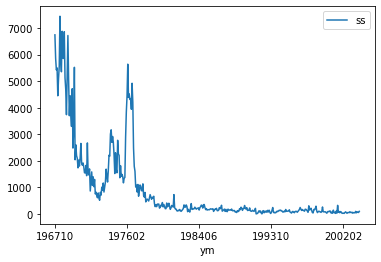

In [20]:
# 第一筆為 target 扣除，看其後的趨勢變化
dfsp=dfs.iloc[1:]
dfsp["ym"]=dfsp.filename.apply(lambda x: x[5:11])
df_ym=dfsp.groupby('ym').agg({'ss':'sum'})
df_ym.plot()

# 先降維再計算相似度

In [21]:
# 為了加快速度，降維，文章間的相似度，以及各篇文的影響指數（相似度加總）

In [22]:
df

,Unnamed: 0,year,filename,tfidf,score
0,0,1966,人民日報_19660128_6_351960,"群众,出版物,美术,工农兵,毛主席,画片,上海人民美术出版社,印制,著作,广大群众,一分钱,...",190433
1,1,1966,人民日報_19660419_6_355238,"文艺,三十,电影,路线,年代,资产阶级,工农兵,工农,电影史,左翼,文艺思想,编著者,毛泽东...",262363
2,2,1966,人民日報_19660419_1_355207,"文艺,资产阶级,革命,无产阶级,毛主席,工农兵,文化战线,思想,斗争,阶级斗争,毛泽东思想,...",332198
3,3,1966,人民日報_19660424_6_355399,"兵临城下,影片,敌人,敌军,资产阶级,崇武,毛主席,国民党,郑汉臣,反动,作者,瓦解,阶级,...",239992
4,4,1966,人民日報_19660425_6_355436,"故事,革命,工农兵,群众,斗争,样板,文艺,阵地,兴无灭资,故事员,大讲,封建主义,毛泽东思...",199515
...,...,...,...,...,...
35243,35243,2003,人民日报_20031226_4_1288139,"毛泽东,1949,传记,1976,错误,历史,读者,这部,材料,书中,出版,新中国,主编,教...",127989
35244,35244,2003,人民日报_20031227_1_1288807,"发展,建设,同志,中国特色社会主义,中国,毛泽东,毛泽东思想,道路,事业,群众,小康社会,马...",232611
35245,35245,2003,人民日报_20031227_7_1289451,"程小青,探案,霍桑,附中,苏州,正养,孤岛,老师,范烟桥,侦探小说,东吴,作家,日寇,上海,...",31579
35246,35246,2003,人民日报_20031229_5_1291890,"杨卫,学生,插队,10,参评,当选,院士,招生,受苦,研究生,知识青年,学校,西北工业大学,...",35110


In [23]:
token=[]
for n in range(len(df)):
    token.append(df.tfidf[n].replace(","," "))
df["token"]=token
df

,Unnamed: 0,year,filename,tfidf,score,token
0,0,1966,人民日報_19660128_6_351960,"群众,出版物,美术,工农兵,毛主席,画片,上海人民美术出版社,印制,著作,广大群众,一分钱,...",190433,群众 出版物 美术 工农兵 毛主席 画片 上海人民美术出版社 印制 著作 广大群众 一分钱 ...
1,1,1966,人民日報_19660419_6_355238,"文艺,三十,电影,路线,年代,资产阶级,工农兵,工农,电影史,左翼,文艺思想,编著者,毛泽东...",262363,文艺 三十 电影 路线 年代 资产阶级 工农兵 工农 电影史 左翼 文艺思想 编著者 毛泽东...
2,2,1966,人民日報_19660419_1_355207,"文艺,资产阶级,革命,无产阶级,毛主席,工农兵,文化战线,思想,斗争,阶级斗争,毛泽东思想,...",332198,文艺 资产阶级 革命 无产阶级 毛主席 工农兵 文化战线 思想 斗争 阶级斗争 毛泽东思想 ...
3,3,1966,人民日報_19660424_6_355399,"兵临城下,影片,敌人,敌军,资产阶级,崇武,毛主席,国民党,郑汉臣,反动,作者,瓦解,阶级,...",239992,兵临城下 影片 敌人 敌军 资产阶级 崇武 毛主席 国民党 郑汉臣 反动 作者 瓦解 阶级 ...
4,4,1966,人民日報_19660425_6_355436,"故事,革命,工农兵,群众,斗争,样板,文艺,阵地,兴无灭资,故事员,大讲,封建主义,毛泽东思...",199515,故事 革命 工农兵 群众 斗争 样板 文艺 阵地 兴无灭资 故事员 大讲 封建主义 毛泽东思...
...,...,...,...,...,...,...
35243,35243,2003,人民日报_20031226_4_1288139,"毛泽东,1949,传记,1976,错误,历史,读者,这部,材料,书中,出版,新中国,主编,教...",127989,毛泽东 1949 传记 1976 错误 历史 读者 这部 材料 书中 出版 新中国 主编 教...
35244,35244,2003,人民日报_20031227_1_1288807,"发展,建设,同志,中国特色社会主义,中国,毛泽东,毛泽东思想,道路,事业,群众,小康社会,马...",232611,发展 建设 同志 中国特色社会主义 中国 毛泽东 毛泽东思想 道路 事业 群众 小康社会 马...
35245,35245,2003,人民日报_20031227_7_1289451,"程小青,探案,霍桑,附中,苏州,正养,孤岛,老师,范烟桥,侦探小说,东吴,作家,日寇,上海,...",31579,程小青 探案 霍桑 附中 苏州 正养 孤岛 老师 范烟桥 侦探小说 东吴 作家 日寇 上海 ...
35246,35246,2003,人民日报_20031229_5_1291890,"杨卫,学生,插队,10,参评,当选,院士,招生,受苦,研究生,知识青年,学校,西北工业大学,...",35110,杨卫 学生 插队 10 参评 当选 院士 招生 受苦 研究生 知识青年 学校 西北工业大学 ...


In [24]:
from __future__ import print_function
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd
import numpy
import numpy as np
import matplotlib.pyplot as plt
import os
import io
import re

## TFIDF

In [26]:
# 文章字詞矩陣
ngram=(1,1)
# TFIDF 加權 ####################
vectorizer = TfidfVectorizer(min_df = 1,ngram_range= ngram)

# token 為斷好詞，空白隔開的字串
dtm_tfidf = vectorizer.fit_transform(token) # sparse matrix

In [27]:
# # 轉成 array
# dtm_tfidf=dtm_tfidf.toarray() 

In [28]:
# 字詞的編號
terms=vectorizer.vocabulary_

# 字詞的 list
term_list=vectorizer.get_feature_names()

In [30]:
# # 轉成 DataFrame
# df_tfidf=pd.DataFrame(dtm_tfidf, columns=term_list)

## SVD

In [31]:
# Fit LSI model to X and perform dimensionality reduction on X.
# 降成的維度數，其值小於 min(m,n)
num_i=100  #############################
# 降維
svd = TruncatedSVD(num_i, algorithm = 'arpack')   # object
# 執行降維，注意輸入的參數格式為 numpy array
dtm_svd_tfidf = svd.fit_transform(dtm_tfidf)  

## 計算各篇文章的影響指數

In [32]:
def similar(vec_a,vec_b):
    # Dot and norm
    dot = sum(a*b for a, b in zip(vec_a, vec_b))
    norm_a = sum(a*a for a in vec_a) ** 0.5
    norm_b = sum(b*b for b in vec_b) ** 0.5
    # Cosine similarity
    cos_sim = dot / (norm_a*norm_b)
    return cos_sim

In [ ]:
# 耗時更久，估計要六天方能完成。 ############
import numpy as np
score=[]
m=-1
for n in range(len(dtm_svd_tfidf)):
    ss=[]  
    m=n+1
    for m in range(len(dtm_svd_tfidf)):
        if m<len(dtm_svd_tfidf)-1:
            s=similar(dtm_svd_tfidf[n], dtm_svd_tfidf[m])
            ss.append(s)      
    score.append(sum(ss))
    if n%1000==0:
        print (n,"/",len(dtm_svd_tfidf),"done")
print (len(score))

In [34]:
################################
# 強迫中斷，只取中斷前的score ####
print (len(score))
df=df.iloc[:len(score)]
dtm_svd_tfidf=dtm_svd_tfidf[:len(df)]

35248


In [35]:
## 存檔
# save excel
pth="D:/my python/people/working/"     #先建一個 working 目錄
fname=pth+"simi2"+title+".xlsx"
writer = pd.ExcelWriter(fname)
df.to_excel(writer,'Sheet1',encoding='utf-8')
writer.save()

In [36]:
###################################################
import pandas as pd
pth="D:/my python/people/working/"    
fname=pth+"simi2"+title+".xlsx"
df=pd.read_excel(fname, 0)
df

,Unnamed: 0,Unnamed: 0.1,year,filename,tfidf,score,token
0,0,0,1966,人民日報_19660128_6_351960,"群众,出版物,美术,工农兵,毛主席,画片,上海人民美术出版社,印制,著作,广大群众,一分钱,...",190433,群众 出版物 美术 工农兵 毛主席 画片 上海人民美术出版社 印制 著作 广大群众 一分钱 ...
1,1,1,1966,人民日報_19660419_6_355238,"文艺,三十,电影,路线,年代,资产阶级,工农兵,工农,电影史,左翼,文艺思想,编著者,毛泽东...",262363,文艺 三十 电影 路线 年代 资产阶级 工农兵 工农 电影史 左翼 文艺思想 编著者 毛泽东...
2,2,2,1966,人民日報_19660419_1_355207,"文艺,资产阶级,革命,无产阶级,毛主席,工农兵,文化战线,思想,斗争,阶级斗争,毛泽东思想,...",332198,文艺 资产阶级 革命 无产阶级 毛主席 工农兵 文化战线 思想 斗争 阶级斗争 毛泽东思想 ...
3,3,3,1966,人民日報_19660424_6_355399,"兵临城下,影片,敌人,敌军,资产阶级,崇武,毛主席,国民党,郑汉臣,反动,作者,瓦解,阶级,...",239992,兵临城下 影片 敌人 敌军 资产阶级 崇武 毛主席 国民党 郑汉臣 反动 作者 瓦解 阶级 ...
4,4,4,1966,人民日報_19660425_6_355436,"故事,革命,工农兵,群众,斗争,样板,文艺,阵地,兴无灭资,故事员,大讲,封建主义,毛泽东思...",199515,故事 革命 工农兵 群众 斗争 样板 文艺 阵地 兴无灭资 故事员 大讲 封建主义 毛泽东思...
...,...,...,...,...,...,...,...
35243,35243,35243,2003,人民日报_20031226_4_1288139,"毛泽东,1949,传记,1976,错误,历史,读者,这部,材料,书中,出版,新中国,主编,教...",127989,毛泽东 1949 传记 1976 错误 历史 读者 这部 材料 书中 出版 新中国 主编 教...
35244,35244,35244,2003,人民日报_20031227_1_1288807,"发展,建设,同志,中国特色社会主义,中国,毛泽东,毛泽东思想,道路,事业,群众,小康社会,马...",232611,发展 建设 同志 中国特色社会主义 中国 毛泽东 毛泽东思想 道路 事业 群众 小康社会 马...
35245,35245,35245,2003,人民日报_20031227_7_1289451,"程小青,探案,霍桑,附中,苏州,正养,孤岛,老师,范烟桥,侦探小说,东吴,作家,日寇,上海,...",31579,程小青 探案 霍桑 附中 苏州 正养 孤岛 老师 范烟桥 侦探小说 东吴 作家 日寇 上海 ...
35246,35246,35246,2003,人民日报_20031229_5_1291890,"杨卫,学生,插队,10,参评,当选,院士,招生,受苦,研究生,知识青年,学校,西北工业大学,...",35110,杨卫 学生 插队 10 参评 当选 院士 招生 受苦 研究生 知识青年 学校 西北工业大学 ...


In [37]:
# 依分數高低排序
df2=df.sort_values(by='score', ascending=False)
df2.head(20)

,Unnamed: 0,Unnamed: 0.1,year,filename,tfidf,score,token
15063,15063,15063,1971,人民日報_19710701_1_409063,"毛主席,革命,无产阶级,路线,我们,社会主义,刘少奇,资产阶级,机会主义,马克思列宁主义,王...",476769,毛主席 革命 无产阶级 路线 我们 社会主义 刘少奇 资产阶级 机会主义 马克思列宁主义 王...
5802,5802,5802,1968,人民日報_19680101_2_372961,"无产阶级,革命,毛主席,文化大革命,毛泽东思想,群众,最新,胜利,一小撮,夺取,一九六八年,...",475253,无产阶级 革命 毛主席 文化大革命 毛泽东思想 群众 最新 胜利 一小撮 夺取 一九六八年 ...
25714,25714,25714,1977,人民日報_19770823_1_491934,"毛主席,四人帮,无产阶级,社会主义,革命,我们,走资派,专政,他们,资产阶级,斗争,党内,反...",469304,毛主席 四人帮 无产阶级 社会主义 革命 我们 走资派 专政 他们 资产阶级 斗争 党内 反...
10584,10584,10584,1969,人民日報_19690428_1_385691,"无产阶级,毛主席,革命,专政,刘少奇,修正主义,资产阶级,斗争,群众,苏修,帝国主义,文化大...",465011,无产阶级 毛主席 革命 专政 刘少奇 修正主义 资产阶级 斗争 群众 苏修 帝国主义 文化大...
4842,4842,4842,1967,人民日報_19671001_3_370652,"无产阶级,革命,毛主席,文化大革命,毛泽东思想,专政,资产阶级,阶级斗争,资本主义,胜利,马...",463750,无产阶级 革命 毛主席 文化大革命 毛泽东思想 专政 资产阶级 阶级斗争 资本主义 胜利 马...
25468,25468,25468,1977,人民日報_19770508_1_488104,"大庆,四人帮,社会主义,学大庆,企业,毛主席,革命,工业,无产阶级,我们,他们,我国,普及,...",460376,大庆 四人帮 社会主义 学大庆 企业 毛主席 革命 工业 无产阶级 我们 他们 我国 普及 ...
25755,25755,25755,1977,人民日報_19770908_1_492444,"毛主席,我们,指示,同志,中央办公厅,五七,群众,无产阶级,四人帮,革命,伟大领袖,学校,你...",457632,毛主席 我们 指示 同志 中央办公厅 五七 群众 无产阶级 四人帮 革命 伟大领袖 学校 你...
19561,19561,19561,1974,人民日報_19740710_3_451433,"批林批孔,革命,团结,无产阶级,孔孟之道,马克思主义,批判,路线,毛主席,我们,工人阶级,群...",453549,批林批孔 革命 团结 无产阶级 孔孟之道 马克思主义 批判 路线 毛主席 我们 工人阶级 群...
21858,21858,21858,1975,人民日報_19751205_3_470312,"无产阶级,教育,资产阶级,学校,革命,专政,毛主席,知识分子,教育战线,改造,路线,马克思主...",448913,无产阶级 教育 资产阶级 学校 革命 专政 毛主席 知识分子 教育战线 改造 路线 马克思主...
25081,25081,25081,1976,人民日報_19761228_1_483822,"四人帮,毛主席,我们,无产阶级,革命,社会主义,他们,伟大,马克思主义,群众,专政,路线,理...",448740,四人帮 毛主席 我们 无产阶级 革命 社会主义 他们 伟大 马克思主义 群众 专政 路线 理...


## 某篇文章與其後文章的相似度

In [38]:
########################
target=5802
########################
ss=[]
for m in range(target, len(dtm_svd_tfidf)):
    if m<=len(dtm_svd_tfidf)-1:
        s=similar(dtm_svd_tfidf[target], dtm_svd_tfidf[m])
        ss.append(s)          
dfs=df.iloc[target:]
dfs["ss"]=ss  
dfs2=dfs.sort_values(by='ss', ascending=False)
dfs2.head(10)

<ipython-input-38-c849289abbf4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs["ss"]=ss


,Unnamed: 0,Unnamed: 0.1,year,filename,tfidf,score,token,ss
5802,5802,5802,1968,人民日報_19680101_2_372961,"无产阶级,革命,毛主席,文化大革命,毛泽东思想,群众,最新,胜利,一小撮,夺取,一九六八年,...",475253,无产阶级 革命 毛主席 文化大革命 毛泽东思想 群众 最新 胜利 一小撮 夺取 一九六八年 ...,1.000000
6597,6597,6597,1968,人民日報_19680328_1_375036,"无产阶级,革命,毛主席,毛泽东思想,浙江省,人民解放军,文化大革命,浙江,驻浙,路线,一小撮...",319159,无产阶级 革命 毛主席 毛泽东思想 浙江省 人民解放军 文化大革命 浙江 驻浙 路线 一小撮...,0.722119
6155,6155,6155,1968,人民日報_19680208_4_373846,"毛主席,无产阶级,毛泽东思想,革命,政治路线,修正主义,建党,赫鲁晓夫,路线,党内,党的建设...",436261,毛主席 无产阶级 毛泽东思想 革命 政治路线 修正主义 建党 赫鲁晓夫 路线 党内 党的建设...,0.715278
6463,6463,6463,1968,人民日報_19680312_4_374641,"无产阶级,毛主席,民主,革命,民主集中制,赫鲁晓夫,毛泽东思想,党内,群众,集中统一,路线,...",411715,无产阶级 毛主席 民主 革命 民主集中制 赫鲁晓夫 毛泽东思想 党内 群众 集中统一 路线 ...,0.710395
7935,7935,7935,1968,人民日報_19680815_1_378726,"毛主席,革命,无产阶级,毛泽东思想,云南省,谭甫仁,司令部,伟大领袖,文化大革命,同志,阶级...",398437,毛主席 革命 无产阶级 毛泽东思想 云南省 谭甫仁 司令部 伟大领袖 文化大革命 同志 阶级...,0.707776
6229,6229,6229,1968,人民日報_19680217_1_374046,"革命,无产阶级,毛主席,毛泽东思想,文化大革命,三结合,群众,北京市,各区,革命派,斗争,最...",348612,革命 无产阶级 毛主席 毛泽东思想 文化大革命 三结合 群众 北京市 各区 革命派 斗争 最...,0.704379
6035,6035,6035,1968,人民日報_19680126_1_373531,"革命,毛主席,无产阶级,毛泽东思想,甘肃省,文化大革命,胜利,兰州,伟大领袖,同志,冼恒汉,...",322154,革命 毛主席 无产阶级 毛泽东思想 甘肃省 文化大革命 胜利 兰州 伟大领袖 同志 冼恒汉 ...,0.699518
8427,8427,8427,1968,人民日報_19681001_2_379888,"无产阶级,革命,毛主席,文化大革命,工人阶级,领导,整党,毛泽东思想,专政,阶级,上层建筑,...",385731,无产阶级 革命 毛主席 文化大革命 工人阶级 领导 整党 毛泽东思想 专政 阶级 上层建筑 ...,0.689284
7780,7780,7780,1968,人民日報_19680801_2_378400,"无产阶级,毛主席,革命,人民解放军,群众,文化大革命,路线,军队,专政,毛泽东思想,胜利,活...",413448,无产阶级 毛主席 革命 人民解放军 群众 文化大革命 路线 军队 专政 毛泽东思想 胜利 活...,0.689000
6560,6560,6560,1968,人民日報_19680323_3_374920,"毛主席,部队,支左,无产阶级,革命,毛泽东思想,革命派,学习,最新,路线,团结,浙江,文化大...",356033,毛主席 部队 支左 无产阶级 革命 毛泽东思想 革命派 学习 最新 路线 团结 浙江 文化大...,0.680297


## 讀取前十篇文章

In [39]:
for n in range(10):
    cur_year=dfs2.iloc[0].year
    fname=str(cur_year)+"_jieba.xlsx"
    temp=pd.read_excel(path+"jieba/"+fname, 0)  
    content=temp[temp.filename==dfs2.iloc[n].filename].doc_content
    print(n,dfs2.iloc[n].filename,"-----------------",dfs2.iloc[n].ss)
    print(list(content))

0 人民日報_19680101_2_372961 ----------------- 1.0
['《人民日报》、《红旗》杂志、《解放军报》一九六八年元旦社论光辉灿烂的一九六八年来到了。东方红，太阳升。在新的一年开始的时候，全国亿万军民怀着无比深厚的阶级感情，衷心祝愿我们的伟大导师毛主席万寿无疆！在我们伟大领袖毛主席的天才领导下，人类历史上第一次无产阶级文化大革命，已经在一九六七年取得了决定性的胜利。在毛主席一系列最新指示的指引下，夺取无产阶级文化大革命全面胜利的伟大斗争已经开始了。当前，无产阶级文化大革命，是一片大好形势。空前广泛和深入的革命群众运动，正沿着毛主席指出的轨道继续向前发展。革命的大批判正在各条战线上进一步展开，中国赫鲁晓夫等党内最大的一小撮走资本主义道路的当权派的反革命罪行，大量地被人民群众揭露出来，使人们对于巩固无产阶级专政、防止资本主义复辟的重要性，有了更具体、更清楚的认识。各省、市、自治区的革命委员会一个接一个地建立起来。教育革命和各条战线的斗、批、改，正在逐步出现新的面貌。文化大革命带动了各方面的工作，我国导弹、氢弹的试验成功，震动了全世界。农业生产获得空前的大丰收。全国热气腾腾，到处是蓬蓬勃勃的革命景象。形势大好最重要的一点是：伟大领袖毛主席的一系列最新指示同广大革命群众见面以后，出现了一个群众性的认真学习和坚决执行毛主席的最新指示的热潮。毛泽东思想学习班如雨后春笋，遍及全国各地，成为活学活用毛泽东思想的学校，成为“斗私，批修”的广阔战场，有力地提高了广大革命干部和革命群众的思想觉悟。革命大联合和革命三结合的步伐大大加快了。革命形势的发展如江河奔泻，完全证实了毛主席在视察时所指出的“再有几个月的时间，整个形势将会变得更好”的科学预见。在新的一年中，全党、全军、全国无产阶级革命派和全国人民，要更高地举起毛泽东思想伟大红旗，以毛主席的最新指示为纲，鼓足干劲，力争上游，再接再厉，从思想上、政治上、经济上、组织上夺取无产阶级文化大革命的全面胜利。为了实现这个伟大的战略目标，摆在我们面前的战斗任务是：第一，更加广泛和深入地开展活学活用毛泽东思想的伟大群众运动。正象林彪副主席所说的那样：“毛泽东思想为广大群众所掌握，就会变成无穷无尽的力量，变成威力无比的精神原子弹。”新的一年，将是几万万革命人民紧紧掌握毛泽东思想去夺取新的伟大胜利的一年。各级领导同志、各

## 相似度遞減趨勢，彙整到月

<ipython-input-40-10466d9c334b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsp["ym"]=dfsp.filename.apply(lambda x: x[5:11])


<AxesSubplot:xlabel='ym'>

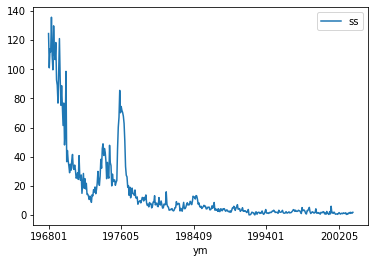

In [40]:
# 第一筆為 target 扣除，看其後的趨勢變化
dfsp=dfs.iloc[1:]
dfsp["ym"]=dfsp.filename.apply(lambda x: x[5:11])
df_ym=dfsp.groupby('ym').agg({'ss':'sum'})
df_ym.plot()

# 加入 people 模組 （待補）